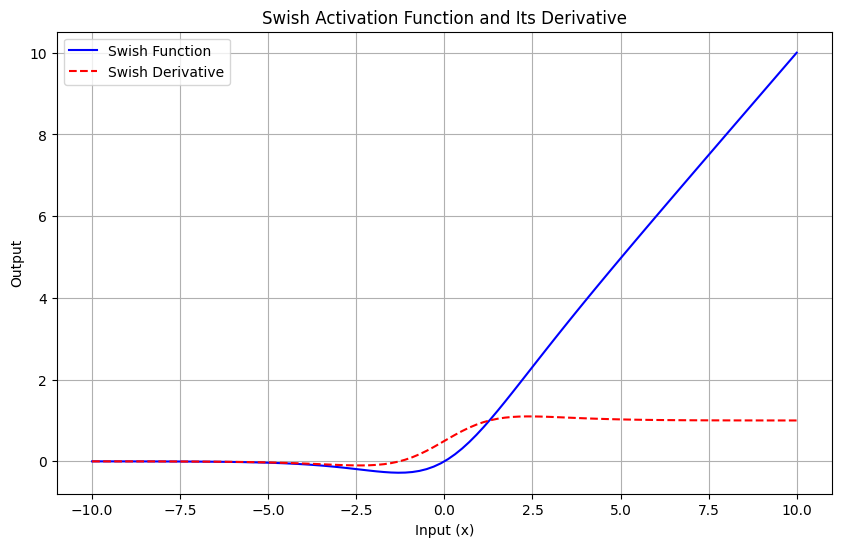

In [1]:
#swish activation

import numpy as np
import matplotlib.pyplot as plt

# Swish function
def swish(x, beta=1.0):
    return x * (1 / (1 + np.exp(-beta * x)))

# Derivative of Swish
def swish_derivative(x, beta=1.0):
    sigmoid = 1 / (1 + np.exp(-beta * x))
    return sigmoid + beta * x * sigmoid * (1 - sigmoid)

# Generate input values
x = np.linspace(-10, 10, 100)
y = swish(x)
y_deriv = swish_derivative(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Swish Function', color='blue')
plt.plot(x, y_deriv, label='Swish Derivative', color='red', linestyle='--')
plt.title('Swish Activation Function and Its Derivative')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

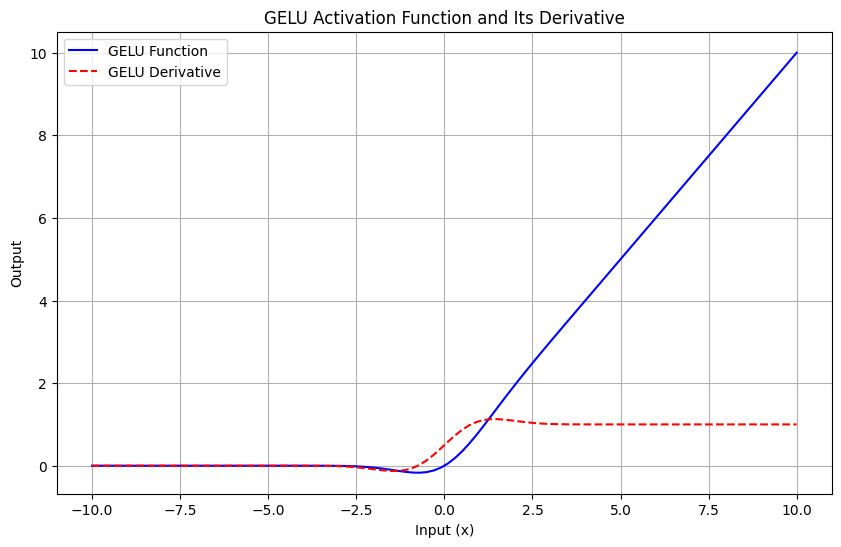

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# GELU function (tanh approximation)
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

# Derivative of GELU (approximate, using numerical differentiation)
def gelu_derivative(x, h=1e-5):
    return (gelu(x + h) - gelu(x - h)) / (2 * h)

# Generate input values
x = np.linspace(-10, 10, 100)
y = gelu(x)
y_deriv = gelu_derivative(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='GELU Function', color='blue')
plt.plot(x, y_deriv, label='GELU Derivative', color='red', linestyle='--')
plt.title('GELU Activation Function and Its Derivative')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

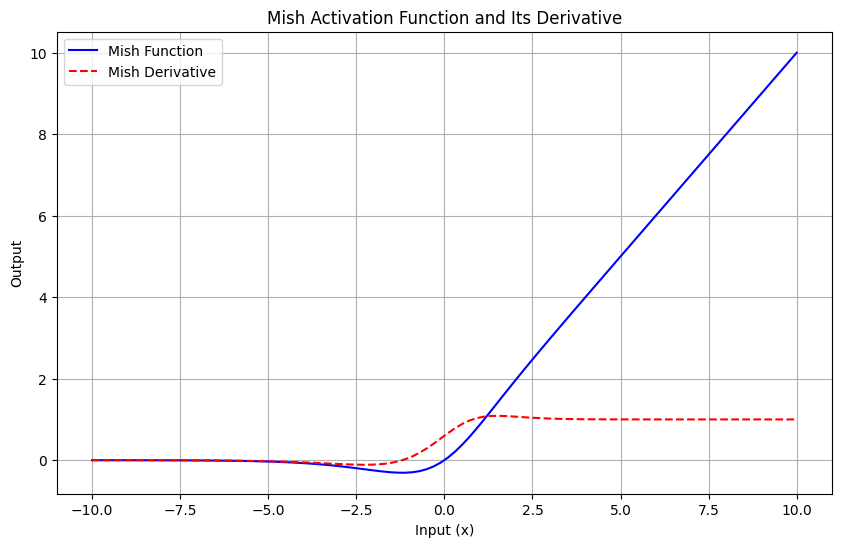

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Mish function
def mish(x):
    softplus = np.log(1 + np.exp(x))
    return x * np.tanh(softplus)

# Derivative of Mish
def mish_derivative(x):
    softplus = np.log(1 + np.exp(x))
    sigmoid = 1 / (1 + np.exp(-x))
    return np.tanh(softplus) + x * (1 - np.tanh(softplus)**2) * sigmoid

# Generate input values
x = np.linspace(-10, 10, 100)
y = mish(x)
y_deriv = mish_derivative(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Mish Function', color='blue')
plt.plot(x, y_deriv, label='Mish Derivative', color='red', linestyle='--')
plt.title('Mish Activation Function and Its Derivative')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

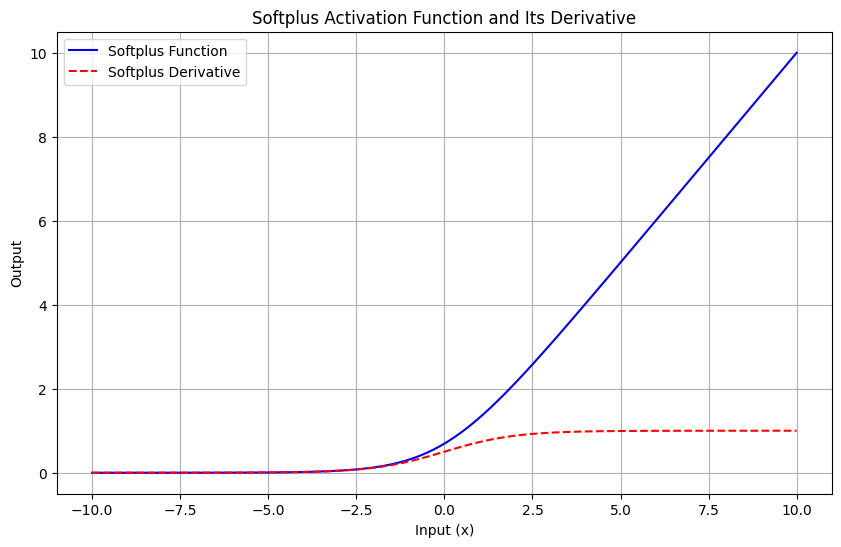

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Softplus function
def softplus(x):
    return np.log(1 + np.exp(x))

# Derivative of Softplus (Sigmoid function)
def softplus_derivative(x):
    return 1 / (1 + np.exp(-x))

# Generate input values
x = np.linspace(-10, 10, 100)
y = softplus(x)
y_deriv = softplus_derivative(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Softplus Function', color='blue')
plt.plot(x, y_deriv, label='Softplus Derivative', color='red', linestyle='--')
plt.title('Softplus Activation Function and Its Derivative')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

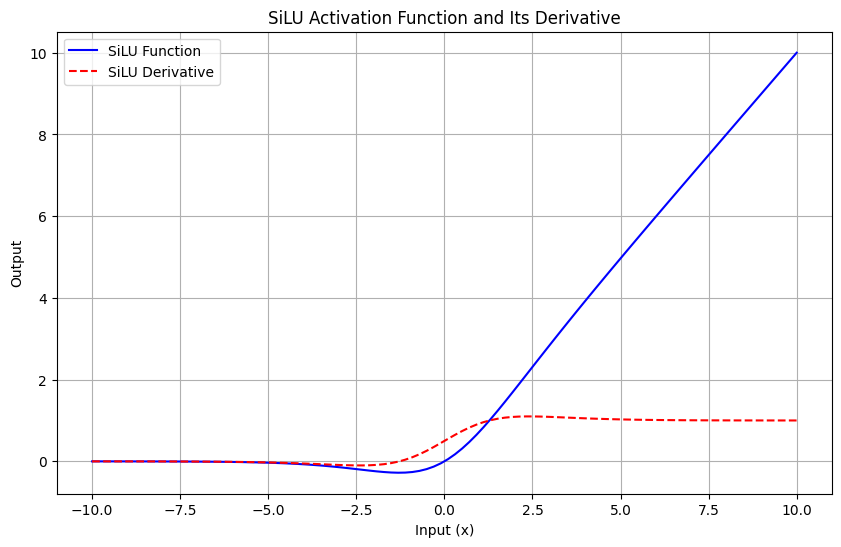

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# SiLU activation function
def silu(x):
    return x * (1 / (1 + np.exp(-x)))

# Derivative of SiLU
def silu_derivative(x):
    sigmoid = 1 / (1 + np.exp(-x))
    return sigmoid + x * sigmoid * (1 - sigmoid)

# Generate input values
x = np.linspace(-10, 10, 100)
y = silu(x)
y_deriv = silu_derivative(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='SiLU Function', color='blue')
plt.plot(x, y_deriv, label='SiLU Derivative', color='red', linestyle='--')
plt.title('SiLU Activation Function and Its Derivative')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SwiGLU(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SwiGLU, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(input_dim, hidden_dim)

    def forward(self, x):
        a = self.linear1(x)                      # Linear projection
        b = self.linear2(x)                      # Second projection
        b_swish = b * torch.sigmoid(b)           # Swish activation
        return a * b_swish                       # Element-wise gating

class TransformerFFN(nn.Module):
    def __init__(self, hidden_dim, ffn_dim):
        super().__init__()
        self.swiglu = SwiGLU(hidden_dim, ffn_dim)
        self.proj_out = nn.Linear(ffn_dim, hidden_dim)

    def forward(self, x):
        return self.proj_out(self.swiglu(x))

